In [3]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn import preprocessing
import datetime
from datetime import date

In [4]:
data = pd.read_csv('Twitter_volume_FB.csv')
data.head()

,timestamp,value
0,2015-02-26 21:42:53,53
1,2015-02-26 21:47:53,64
2,2015-02-26 21:52:53,49
3,2015-02-26 21:57:53,48
4,2015-02-26 22:02:53,22


In [8]:
time_data = pd.read_csv('Twitter_volume_FB.csv', index_col='timestamp',parse_dates=['timestamp'])
time_data.head()

,value
timestamp,
2015-02-26 21:42:53,53
2015-02-26 21:47:53,64
2015-02-26 21:52:53,49
2015-02-26 21:57:53,48
2015-02-26 22:02:53,22


/home/sean/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


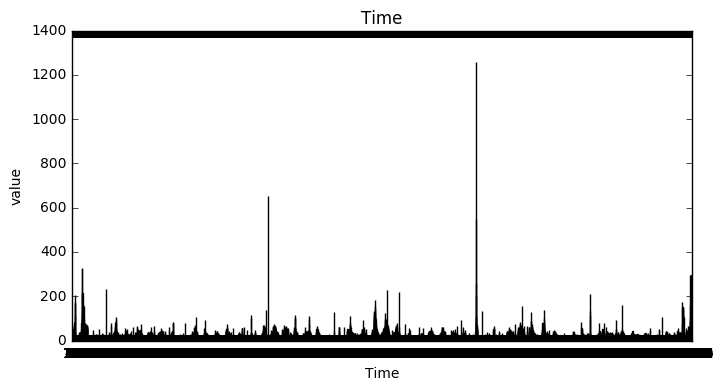

In [7]:
plt.figure(figsize=(8,4))
plt.title("Time") 
plt.xlabel("Time")
ax1 = sns.barplot(x=data.index, y="value", data=time_data)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

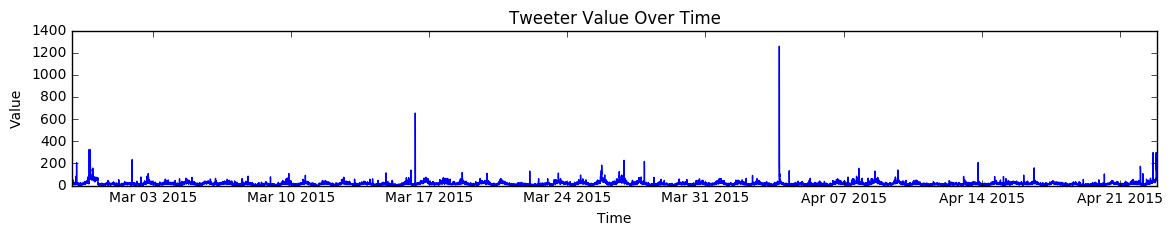

In [13]:
plt.figure(figsize=(14,2))
plt.title("Tweeter Value Over Time")
plt.xlabel("Time")
plt.ylabel("Value")
plt.plot(time_data)

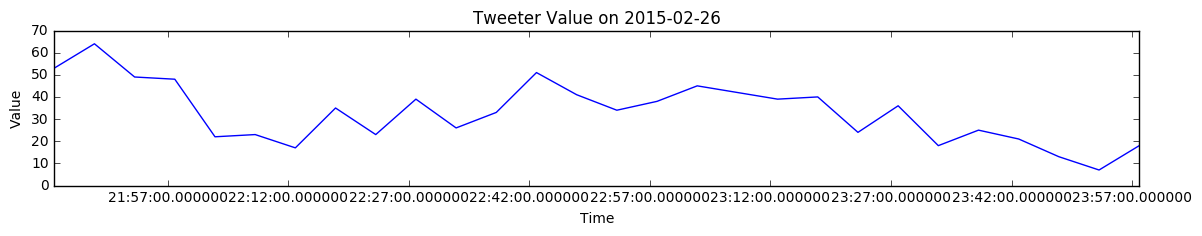

In [14]:
oneday = time_data.loc[(time_data.index >= "2015-02-26") & (time_data.index < "2015-02-27")]
plt.figure(figsize=(14,2))
plt.title("Tweeter Value on 2015-02-26")
plt.xlabel("Time")
plt.ylabel("Value")
plt.plot(oneday)

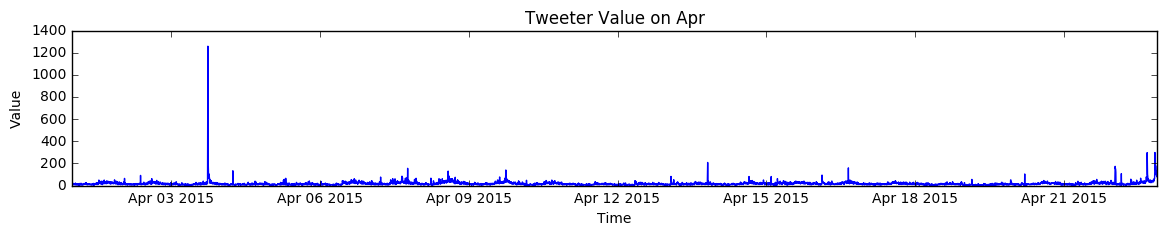

In [15]:
Apr = time_data.loc[(time_data.index >= "2015-04-01") & (time_data.index < "2015-05-01")]
plt.figure(figsize=(14,2))
plt.title("Tweeter Value on Apr")
plt.xlabel("Time")
plt.ylabel("Value")
plt.plot(Apr)

## Anomaly Detection

In [31]:
def plot(time_data, outliers, method):
    fig, ax = plt.subplots(figsize=(14,2))
    ax.set(xlabel="Time", ylabel="Value", title="Tweeter Value Over Time")
    ax.plot(time_data)
    ax.scatter(outliers.index, outliers.value, c="#ff9999" , marker=",", zorder=1)
    print(method)
    print("Number of Anomalies: " + str(outliers.shape[0]))

IsolationForest with 0.005
Number of Anomalies: 79


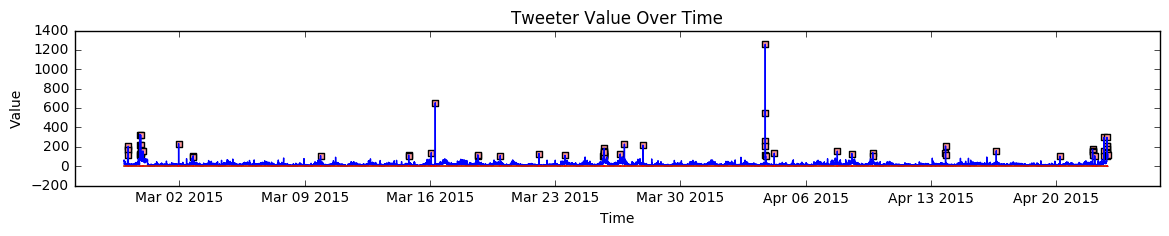

In [35]:
#Isolation Forest
from sklearn.ensemble import IsolationForest
IFModel = IsolationForest(contamination=.005, behaviour="new")
IFModel.fit(time_data)
time_data['Anomaly'] = IFModel.predict(time_data)

outliers = time_data.loc[time_data.Anomaly == -1]
plot(time_data, outliers, "IsolationForest with 0.005" )

IsolationForest with 0.003
Number of Anomalies: 44


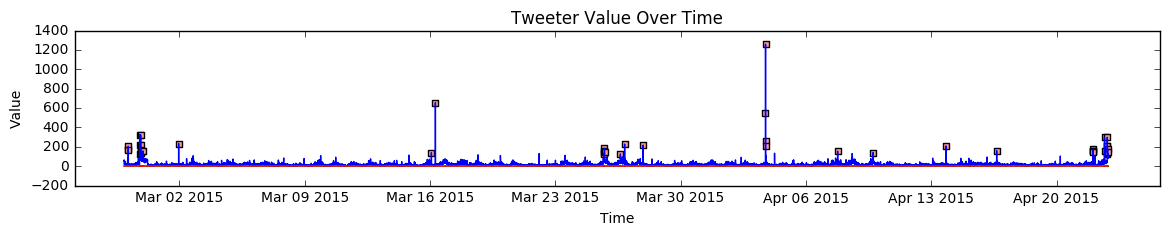

In [36]:
#Isolation Forest
IFModel = IsolationForest(contamination=.003, behaviour="new")
IFModel.fit(time_data)
time_data['Anomaly'] = IFModel.predict(time_data)

outliers = time_data.loc[time_data.Anomaly == -1]
plot(time_data, outliers, "IsolationForest with 0.003" )

IsolationForest with 0.001
Number of Anomalies: 13


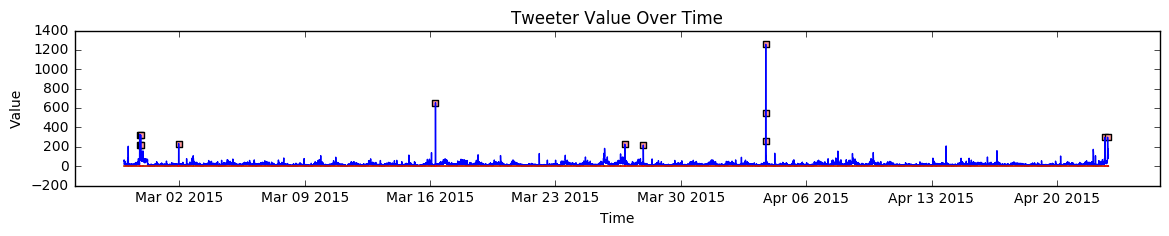

In [37]:
#Isolation Forest
IFModel = IsolationForest(contamination=.001, behaviour="new")
IFModel.fit(time_data)
time_data['Anomaly'] = IFModel.predict(time_data)

outliers = time_data.loc[time_data.Anomaly == -1]
plot(time_data, outliers, "IsolationForest with 0.001" )

### Analysis 

- By setting outliers threshold, IsolationForest allow us to adjust the range of anomalies that we want to get.
- When contamination is low, the results are those extreme anomalies.
- When contamination is high, the results may be some specific situation.